# Exercise: Gaussian processes
_[Original](http://mlg.eng.cam.ac.uk/teaching/4f13/1718/cw/coursework1.pdf) by Carl Rasmussen and Manon Kok for [CUED course 4f13](http://mlg.eng.cam.ac.uk/teaching/4f13/1718/). This version adapted by Damon Wischik._

In this assignment you will use Gaussian process modelling.
This coursework uses the Python package [`sklearn.gaussian_process`](http://scikit-learn.org/stable/modules/gaussian_process.html) which is the rough equivalent of the [GPML](http://www.gaussianprocess.org/gpml/code/matlab/doc/) package for MATLAB. See the appendix at the end of this document for a walkthrough.

**What to submit.**
Your answers should contain an explanation of what you do, and
2&ndash;4 central commands to achieve it. 
The focus of your answer should be
_interpretation:_ explain what the numerical values and graphs
you produce _mean,_ and why they are as they are.  The text of
your answer to each question should be no more than a paragraph or
two. Marks will be awarded based on the clarity and insight in your explanations.

DO NOT SUBMIT FULL SOURCE CODE, unless it is as an appendix. Do not repeat the question text in your answers. If you submit your answers as a Jupyter notebook, structure the notebook in two sections: a section at the top for the examiner to read with just your answers and trimmed code snippets, and a section at the bottom with all your working code.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas
import sklearn.gaussian_process as gp

## Question (a)

Load data from `https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/cw1a.mat`. Consider a Gaussian process with a squared exponential covariance function,
```
ν**2 * gp.kernels.RBF(length_scale=λ) + gp.kernels.WhiteKernel(noise_level=σ),
```
and maximize the log marginal likelihood starting with hyperparameters `λ=np.exp(-1)`, `ν=1`, `σ=1`. Show the 95% predictive error bars. Comment on the predictive error bars and the optimized hyperparameters.

In [2]:
import requests, io, scipy.io
r = requests.get('https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/cw1a.mat')
with io.BytesIO(r.content) as f:
    data = scipy.io.loadmat(f)
    x,y = data['x'], data['y']

## Question (b)

The 95% predictive error bars depict the total uncertainty about a new readout
$$
Y_\text{new} = F(x_\text{new}) + N(0,\sigma^2)
$$
conditional on the dataset. Here $F$ is the underlying Gaussian process, and $\sigma$ is the white noise standard deviation. Update your plot from part (a) to 
show how much of the total uncertainty is because we're uncertain about $F$, and how much is uncertainty due to white noise.

## Question (c)

Show that by initializing the hyperparameters differently, you can ﬁnd a different local optimum for the hyperparameters. Try a range of values and show the fit. In your fit, show both the 95% predictive error bars, and also the 95% error bars showing just the uncertainty about the posterior distribution of the underlying random function.
Explain what is going on. Which fit is best, and why? 

Fit a RBF kernel but without white noise, and plot it. Explain what you see.

## Question (d)

Train instead a GP with a periodic covariance function, using [`gp.kernels.ExpSineSquared`](http://scikit-learn.org/stable/modules/gaussian_process.html#exp-sine-squared-kernel) plus white noise. Show the fit. Comment on the
behaviour of the error-bars, compared to your fit from (a). Do you think the data generating mechanism
was really periodic? Why, why not?

## Question (e)

Consider a Gaussian process with the following covariance function:
```
1 * gp.kernels.ExpSineSquared(length_scale=np.exp(-0.5), periodicity=1) 
    * gp.kernels.RBF(length_scale=np.exp(2)))
```
Sample several different functions from this distribution, and plot them, and explain their behaviour. Don't add noise to the function values, i.e. don't add `gp.kernels.WhiteKernel()` to the kernel. Note: you can sample a set of values using 
`GaussianProcessRegressor.sample_y`.

_The choice of kernel dictates what output are likely. By looking at sample functions, 
you gain experience of the expressive power of Gaussian process models. Ultimately, you should be able to look at a scatterplot and
know straight away what type of kernel would be a good fit._

## Question (f)

Load `https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/cw1e.mat`. This data has two-dimensional input and scalar output. Visualise the data, e.g. using the code snippets in the appendix.
Consider two different Gaussian process models of the data, one using covariance function
`RBF(length_scale=[l1,l2])`
and the other using the sum of two such `RBF` terms. (Make sure to break symmetry, e.g. by choosing the initial hyperparameters randomly, and include white noise.)

Compare the two models. How do the data fits compare? How do the marginal likelihoods compare? What is your interpretation? Which of the two is better?

> When `length_scale` is a list, the `RBF` kernel uses separate length-scale parameters for each dimension of the input space. In GPML it is known as 'Squared Exponential with Automatic Relevance Determination', `covSEard`. It is a useful tool to learn which inputs are important for predictions: if length-scales are short, inputs are very important, and when they grow very long (compared to the spread of the data), the corresponding inputs will be largely ignored.

In [14]:
r = requests.get('https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/cw1e.mat')
with io.BytesIO(r.content) as f:
    data = scipy.io.loadmat(f)
    x,y = data['x'], data['y']

## Question (g)

Load `https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/twoseries.csv`. This data consists of two time series, where $t$ is time, $k$ is the index of the series, and $y$ is the output. 
The data has two-dimensional input, but the second dimension is categorical rather than numerical, so it doesn't make sense to use the RBF kernel. Instead,
consider the model
$$
Y_{t,k} = Z_t + E_k + \operatorname{Normal}(0,\sigma^2)
$$
where $Z_t$ is a shared underlying RBF Gaussian process, and $E_1$ and $E_2$ are independent $\operatorname{Normal}(0,\rho^2)$ offsets, giving
$$
\operatorname{Cov}(Y_{t,k}, Y_{t',k'}) = \nu^2 \exp \Bigl( -\frac{(t-t')^2}{2\ell^2}\Bigr) + \rho^2 \delta_{k k'} + \sigma^2 \delta_{t t'}\delta_{k k'}.
$$
Implement a kernel for this model, fit it, and plot your predicted values for the two time series.

In [6]:
twoseries = pandas.read_csv('https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/twoseries.csv')
t,k,y = twoseries['t'].values, twoseries['k'].values, twoseries['y'].values

<div style="height: 15em"></div>

# Appendix

## Gaussian processes in Python

Here is a simple example of how to use `sklearn.gaussian_process`. For full details, see the [documentation](http://scikit-learn.org/stable/modules/gaussian_process.html).

Let's consider a simple Gaussian process model: a prior on the space of Gaussian processes, with mean 0, and with covariance function
$$
k(x, x') = \nu^2 \exp \Bigl( -\frac{(x-x')^2}{2\ell^2}\Bigr)
$$
(this function is called `RBF` in `sklearn.gaussian_process` and `covSEiso` in GPML). Suppose that the data model is  
$$
p(y\:|\:x,f) \sim
\operatorname{Normal}\bigl(f(x), \sigma^2 I\bigr)
$$
where $x$ and $y$ are vectors and $f(x)$ means $(f(x_1),\dots,f(x_n))$. In this model, $\nu$, $\ell$ and $\sigma$ are hyperparameters. Another way to write out this entire model is with a single covariance function,
$$
k(x, x') = \nu^2 \exp \Bigl( -\frac{(x-x')^2}{2\ell^2}\Bigr) + \sigma^2 \delta_{x x'}.
$$

In the `gaussian_process` package, a Gaussian process model is specified by a _kernel_ object. (Kernel is another name for covariance function.) The package has a [library of kernels](http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels), each implemented as a Python class, and we can create composite kernels by adding together and multiplying kernel objects.

In [7]:
l = np.exp(-1)
ν = 0.5
σ = 1
kernel1 = ν**2 * gp.kernels.RBF(length_scale=l) + gp.kernels.WhiteKernel(noise_level=σ)
kernel1

0.5**2 * RBF(length_scale=0.368) + WhiteKernel(noise_level=1)

To extract parameters from a kernel, use `get_params()`. You can also use `set_params` to set the parameters for a kernel.

In [8]:
kernel1.get_params()

{'k1': 0.5**2 * RBF(length_scale=0.368),
 'k2': WhiteKernel(noise_level=1),
 'k1__k1': 0.5**2,
 'k1__k2': RBF(length_scale=0.368),
 'k1__k1__constant_value': 0.25,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 0.36787944117144233,
 'k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k2__noise_level': 1,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

Machine learning functions are implemented via the class `GaussianProcessRegressor`, which is initialized with a kernel object. It has methods for learning hyperparameters and making predictions. We can access a model's kernel with `GaussianProcessRegressor.kernel`.

In [9]:
model1 = gp.GaussianProcessRegressor(kernel=kernel1)
model1.kernel

0.5**2 * RBF(length_scale=0.368) + WhiteKernel(noise_level=1)

To learn hyperparameters, use `GaussianProcessRegressor.fit(x,y)`. It requires the input coordinates (the $\boldsymbol{x}_i$) to be an array with one row per observation. In the example below we have one-dimensional input, so we have to reshape it to be a column vectors. We can access the fitted kernel, and thence the fitted parameters, with `model.kernel_`.

In [10]:
# Training data
x = np.array([0.57650, 0.43504, 0.76607, -0.78369, -1.27129, -0.66034, 1.18100, 
              0.25929, 0.50898, -0.73703, 0.83023, 1.60078, -0.34655, -0.68073, 
              -1.21480, -0.55955, -1.28229, 0.85388, 0.73265, -0.75330])
y = np.array([ 0.96948, 1.08384, 0.62050, -0.65940, 0.54944, -0.88911, -0.37886,
              0.77166, 0.97753, -0.75901, 0.76003, -1.13327, -0.74600, -0.99293,
              0.60169, -0.98088, 0.55333, 0.60247, 0.99501, -0.83345])

model1.fit(x[...,np.newaxis], y)

GaussianProcessRegressor(kernel=0.5**2 * RBF(length_scale=0.368) + WhiteKernel(noise_level=1))

To make predictions with a fitted model, call `GaussianProcessRegressor.predict(x)`. As before, `x` should be a column vector.

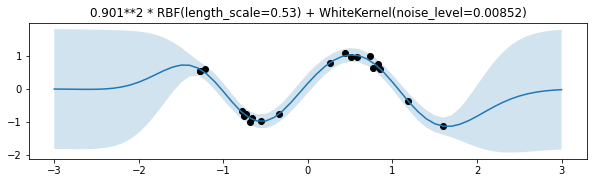

In [11]:
# New values of x where we want to make a prediction
newx = np.linspace(-3, 3, 61)
μ,σ = model1.predict(newx[..., np.newaxis], return_std=True)

# Plot the output.
fig,ax = plt.subplots(figsize=(10,2.5))
ax.fill_between(newx, μ-2*σ, μ+2*σ, alpha=.2)
ax.plot(newx, μ.squeeze())
ax.scatter(x, y, color='black')
ax.set_title(model1.kernel_)
plt.show()

## Custom kernels

If there is no standard kernel that captures the covariance function we want, it's easy to implement a custom kernel. 
Below is a reimplementation of the RBF kernel, which has covariance function
$$
k(x, x') = \exp \Bigl( -\frac{(x-x')^2}{2\ell^2}\Bigr).
$$
The main method is `__call__`, which computes a covariance matrix, 
and is invoked by
```
k = MyRBFKernel(length_scale=2.718)
x = np.array([1,2,4])[:, np.newaxis]
y = np.array([1.5,3])[:, np.newaxis]
k(x,y)     # returns a matrix m_{i,j} = kernel(x_i, y_j)
```
The `__init__` constructor should accept arguments for each hyperparameter,
and there should be `hyperparameter_X` properties that describe each hyperparameter.
The simple implementation below requires $x\in\mathbb{R}$, but the [source code for the built-in RBF kernel](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/gaussian_process/kernels.py) allows multidimensional features $\boldsymbol{x}\in\mathbb{R}^d$ with anisotropic length-scale $\ell\in\mathbb{R}^d$.
It is also more efficient.

In [12]:
from scipy.spatial.distance import cdist  # cdist(X,Y, metric=...) returns a matrix M_{i,j} = dist(X[i], Y[j])

class MyRBFKernel(gp.kernels.Kernel):
    def __init__(self, length_scale=1.0, length_scale_bounds=(1e-5, 1e5)):
        self.length_scale = length_scale
        self.length_scale_bounds = length_scale_bounds

    @property
    def hyperparameter_length_scale(self):
        # return Hyperparameter(name, type, bounds, num.dimensions).
        # The Hyperparameter class also has a property .fixed.
        return gp.kernels.Hyperparameter("length_scale", 'numeric', self.length_scale_bounds, 1)

    def is_stationary(self):
        return True
    
    def diag(self, X):
        # The code, as originally posted, returned self(X,X), which is incorrect.
        return np.diagonal(self(X, X))

    def __call__(self, X, Y=None, eval_gradient=False):
        X = np.atleast_2d(X)
        Y = np.atleast_2d(Y) if Y is not None else X
        if X.ndim != 2 or Y.ndim != 2 or X.shape[1] != 1 or Y.shape[1] != 1:
            raise ValueError("Features must be scalars")
        length_scale = np.squeeze(self.length_scale).astype(float)
        if length_scale.ndim != 0:
            raise ValueError("Length scale must be a number")
        
        K = np.exp(-0.5 * cdist(X, Y, metric='sqeuclidean') / length_scale**2)
        
        if not eval_gradient:
            return K

        # The gradient is with respect to log-transformed parameters.
        # I.e. if length_scale=exp(x), then eval_gradient should return d/dx.
        # If there are multiple hyperparameters, return an array with one
        # column for each non-fixed hyperparameter, sorted alphabetically
        # by hyperparameter name.
        if self.hyperparameter_length_scale.fixed:
            K_gradient = np.empty((len(X), len(Y), 0))
        else:
            K_gradient = K * cdist(X, Y, metric='sqeuclidean') / length_scale**2
        return K, K_gradient[:, :, np.newaxis]

    def __repr__(self):
        return f"RBF(length_scale={self.length_scale:.3g})"

## Plotting a function of two variables

Here are some ways we might plot the data from part (f).

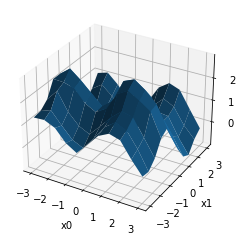

In [15]:
from mpl_toolkits.mplot3d import axes3d   # import a library to allow 3d plots

# Reshape the data to be in array form
X = x[:,0].reshape((11,11))
Y = x[:,1].reshape((11,11))
Z = y.reshape((11,11))

# Get axes for a 3d plot, and then plot the surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.show()

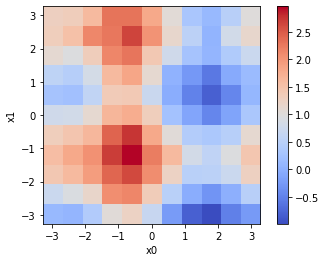

In [16]:
# A heatmap
fig,ax = plt.subplots()
im = ax.imshow(y.reshape((11,11)), extent=np.array([-3,3,-3,3])*12/11, cmap=plt.get_cmap('coolwarm'))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
fig.colorbar(im)
plt.show()